# TODO: 
- Separate the theory into the presentation 
- Show the examples on the simple datasets 
- Leave the ying-yang dataset for the exercises 
- Show the results using pdpBox
- Give students an indication of where (in minutes) they should be at each point of the lecture 

# Learning Unit 2 - Making predictions 101 - Example 

In [178]:
# Imports, feel free to ignore 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from code_utils import utils
from IPython.display import Math
import math 
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz
% matplotlib inline 

## 1 - Binary Classification 

You might have noticed something about the exercise and examples: we are interested in _"whether a mushroom is poisonous, or not"_, and _"Whether a Titanic passenger survived, or not"_. 

This type of problem, where you are trying to predict which of 2 classes an observation belongs to, is called [Binary Classification](https://en.wikipedia.org/wiki/Binary_classification).

To demonstrate this, we will be using an extremely simple dataset:

In [39]:
simple = utils.get_ying_yang()   # often df is used as shorthand for dataframe 

It just has 2 features, `a`, and `b`, and we will be trying to predict `c`. 

In [40]:
simple.head(2)

,a,b,c
0,0.031595,0.986988,0
1,2.115098,-0.046244,1


A bit of nomenclature: 
> **"target"**: that which we are trying to predict (in this case `c`). We often represent the target as `y`

> **"features"**: that which we use to predict the target (in this case `a` and `b` are both features). We represent the features as `X`  

> The **training set** is the data that will be used to train the model. Both `X_train` and `y_train` are part of the training set. 

> The **test set** is the data which is set aside to evaluate the model. It should always be different from the training set (we'll break that rule here to illustrate). As before, `X_test` and `y_test` will, repectively, be the features and target of the test set. 

![title](https://github.com/PedroGFonseca/how_to_learn_ds_meetup/raw/e553355800341008d524217912fe4ac0f2e07257/images/test_train.png)

In our case, we will call `a` and `b` features, and say that `c` is the target we are trying to predict 

In [160]:
X_train = simple[['a', 'b']]  # <-- the double brackets are because we are passing a list 
y_train = simple['c']

Because we are only in 2 dimentions, we can even "cheat" and look at the data with a quick scatterplot: 

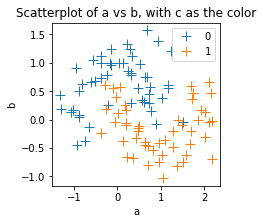

In [161]:
utils.scatterplot(simple, 'a', 'b', 'c', small=True)

Pretty simple, our classifier just needs to figure out the following: 
> the area to the "left" is 1  
> the area to the "right" is 0  

## 3 - Working with scikit classifiers 

There are many ways to do binary classification, but here we will focus on just 3 algorithms:

- [Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) 
- [Decision Tree Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- [KNN Classifier ("K nearest neighbours")](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

To make predictions, we will be using the [scikit-learn library](http://scikit-learn.org/stable/index.html). It is generally the standart for getting started with Machine Learning in Python, and a number of production systems use it for its simplicity and excellent community. 

The API is extremely simple. When you have some features, and a target, you can fit a model by doing the following: 

> `model.fit(features, target)`

So what does it mean to `fit` (also known as training) a model? 

Essentially, you are showing it some training data (some features, and a target), and allowing it to set its parameters (there are exceptions, but we'll cover this later) so that it can predict new observations.



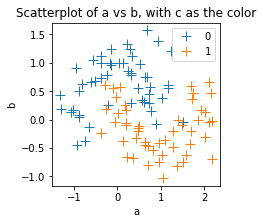

In [162]:
utils.scatterplot(simple, 'a', 'b', 'c', small=True)

The easiest classifier to think about might be the [Logistic Regression](scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). 

### Using `fit`, `predict`, and `predict_proba`

To ilustrate the use of the scikit API, we will use the Logistic Regression. 

We start by instanciating a Logistic regression. Nothing much happens at this stage: 

In [158]:
logit = LogisticRegression() # just instanciating! 

Now we `fit` the model, passing it the `X_train`, and the `y_train`

In [163]:
logit.fit(X=X_train, 
          y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

The logit is now fit, meaning that it has its parameters set, and is ready to make new predictions

We can now make predictions, using the `predict` method 

*Note: remember, we should never predict the training set, we're doing that here just to illustrate*

In [156]:
predictions = logit.predict(X_train)  # notice that we dont' need the target now 

What do these predictions look like? 

In [157]:
print(predictions)

[0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0
 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1
 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0]


It can also predict probabilities, instead of predicting just 0 or 1: 

In [164]:
proba_predictions = logit.predict_proba(X_train) # nomenclature becomes "predict_proba" 

print(proba_predictions[0:10])  # printing only the first 10 predictions 

[[ 0.91649855  0.08350145]
 [ 0.06755059  0.93244941]
 [ 0.22440009  0.77559991]
 [ 0.49094284  0.50905716]
 [ 0.08910541  0.91089459]
 [ 0.29532752  0.70467248]
 [ 0.53795556  0.46204444]
 [ 0.04749218  0.95250782]
 [ 0.73058308  0.26941692]
 [ 0.24125754  0.75874246]]


You will notice that each prediction is composed of two values, which add to one. 

That's because they are the _"probability of being 0"_ and the _"probability of being 1"_

To simply get the probability of being 1, we can do the following: 

In [50]:
proba_1 = proba_predictions[:,1]   # the syntax is a bit ugly, but it essentially means "all entries, item 1"

Let's observe the first 10 again: 

In [51]:
proba_1[0:10]

array([ 0.08350145,  0.93244941,  0.77559991,  0.50905716,  0.91089459,
        0.70467248,  0.46204444,  0.95250782,  0.26941692,  0.75874246])

So essentially if you threashold these at 0.5, you get the predictions. 

So how well did our classifier do? 

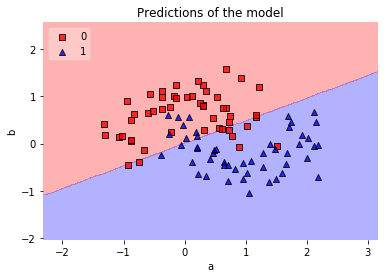

In [166]:
plot_boundaries(X_train, y_train, logit)

Not particularly great. Too linear. 

#### Decision Tree Classifier 

Trees are slightly more powerful models than the logistic regressions, because they aren't forced to be linear. Let's see how a tree predicts our dataset: 

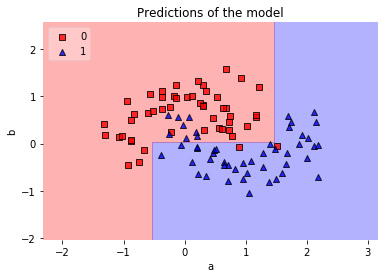

In [122]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)
plot_boundaries(X_train, y_train, dt)

Slightly smarter. What if we change the hyper parameters? 

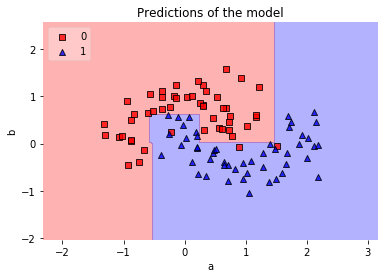

In [123]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_split=10)
dt.fit(X_train, y_train)
plot_boundaries(X_train, y_train, dt)

#### KNN Classifier 

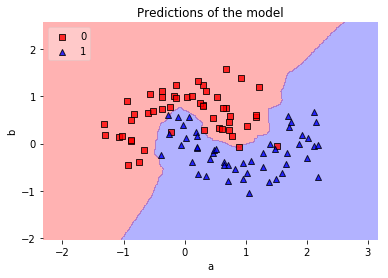

In [124]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
plot_boundaries(X_train, y_train, knn)

What if we make the `n_neighors` smaller?

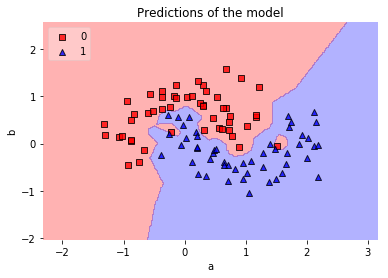

In [126]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
plot_boundaries(X_train, y_train, knn)

Here we observe something interesting. We got more of our training set right, but we can tell by looking at it that something is wrong. How can we avoid this? 

## 3 - Overfitting and train-test-split 

In [167]:
X_train, X_test, y_train, y_test = train_test_split(simple[['a', 'b']], 
                                                    simple['c'], 
                                                    test_size=0.33, 
                                                    random_state=42)

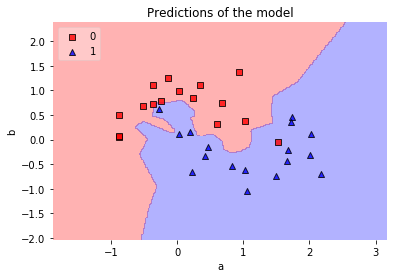

In [168]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
plot_boundaries(X_test, y_test, knn)

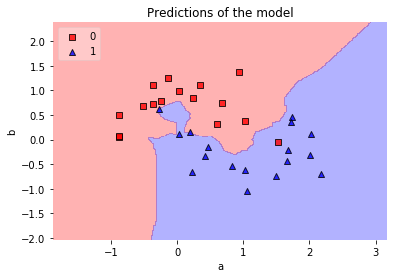

In [169]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
plot_boundaries(X_test, y_test, knn)

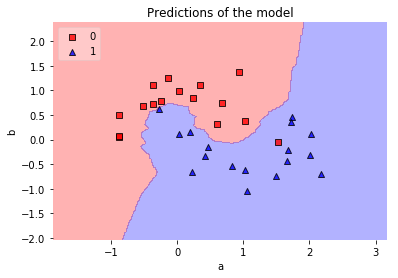

In [170]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
plot_boundaries(X_test, y_test, knn)

## 4 - Evaluating our results 

Hopefully you now have an intuition as to why it is important to always train on your traninig set, and test on your test set. 

One trivial (but often too basic) way to evaluate your model is using accuracy (literally percentage of times you get the answer right): 

In [179]:
# toy example 
predicted = [1, 0, 1]
true = [1, 0, 0]
print(accuracy_score(y_true=true, y_pred=predicted))

0.666666666667


Let's evaluate how well each of our classifiers does on unseen data: 

###### Logit 

In [182]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_true=y_test, y_pred=predictions)
print('Accuracy for %s was %0.2f' % ('Logistic Regression', accuracy))

Accuracy for Logistic Regression was 0.85


The pattern is always the same, so we might as well make this a function: 

###### Decision Tree Classifier 

In [183]:
model = DecisionTreeClassifier(max_depth=5, min_samples_split=5)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_true=y_test, y_pred=predictions)
print('Accuracy for %s was %0.2f' % ('Decision Tree Classifier', accuracy))

Accuracy for Logistic Regression was 0.88


###### KNN 

In [201]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_true=y_test, y_pred=predictions)
print('Accuracy for %s was %0.2f' % ('K nearest neighbours', accuracy))

Accuracy for K nearest neighbours was 0.97


## 5 - Using this on our mushrooms 

In [267]:
data = pd.read_csv('data/prepared_mushrooms.csv')

print('\n\n')
print('Our mushroom dataset has %0.0f rows and %0.0f columns'  % (data.shape[0], data.shape[1]))
data.head(3)




Our mushroom dataset has 8124 rows and 29 columns


,is_poisonous,height,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,...,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y
0,1,4.6,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,4.8,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,5.6,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [271]:
target = 'is_poisonous'
features = [column for column in data.columns if column != target]

In [272]:
X_train, X_test, y_train, y_test = train_test_split(data[features], 
                                                    data[target], 
                                                    test_size=0.33, 
                                                    random_state=42)

In [273]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_true=y_test, y_pred=predictions)
print('Accuracy for %s was %0.4f' % ('Logistic Regression', accuracy))

Accuracy for Logistic Regression was 0.9705


In [275]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_true=y_test, y_pred=predictions)
print('Accuracy for %s was %0.4f' % ('K nearest neighbours', accuracy))

Accuracy for K nearest neighbours was 0.9623


In [287]:
model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=100)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_true=y_test, y_pred=predictions)
print('Accuracy for %s was %0.4f' % ('Decision Tree Classifier', accuracy))

Accuracy for Decision Tree Classifier was 0.9482


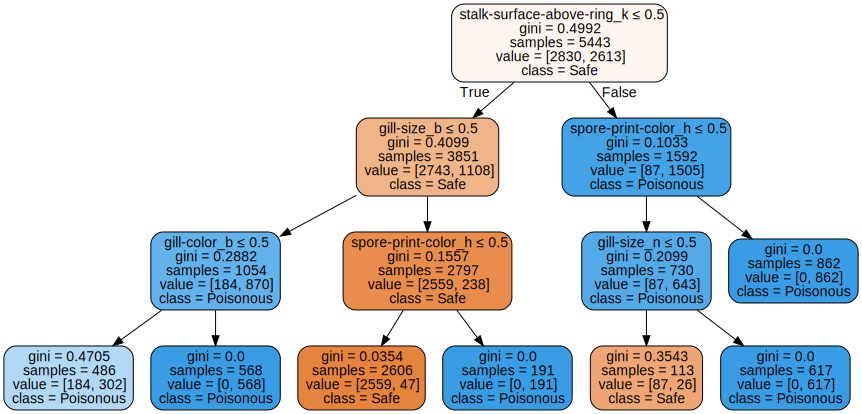

In [288]:
dot_data = tree.export_graphviz(model, out_file=None, 
                         feature_names=features,
                         class_names=['Safe', 'Poisonous'],
                         filled=True, rounded=True,  
                         special_characters=True)  


graphviz.Source(dot_data)  